In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
#fill the NaN value to mean value of the column
df=df.fillna(df.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
#We don’t need customer id data for clustering.

df.drop(["CUST_ID"], axis = 1, inplace = True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
## let's see the columns with nas
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

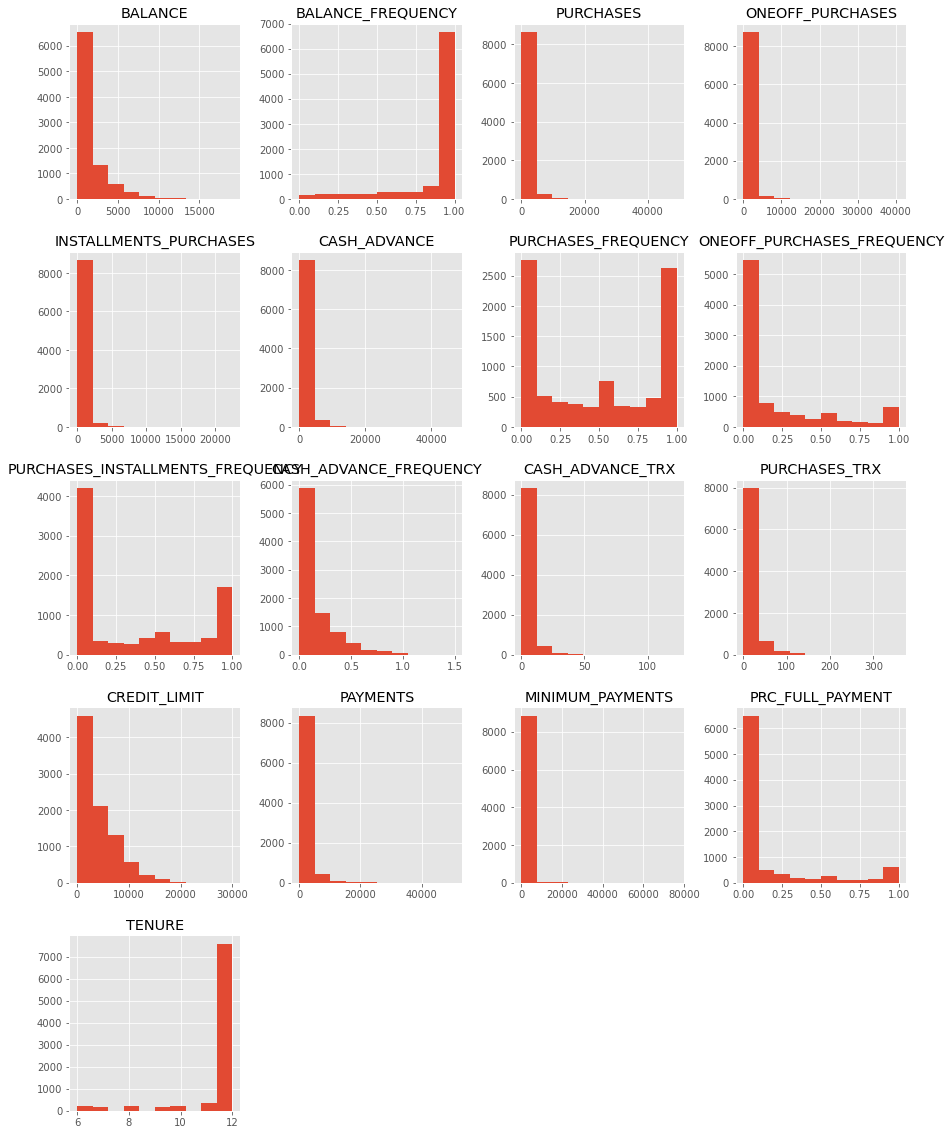

In [7]:
df.hist(figsize = (15,20));

In [15]:
# after the imputation 
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
from sklearn.preprocessing import StandardScaler

escala = StandardScaler()

copiadata = escala.fit_transform(df)
datacopia = pd.DataFrame(copiadata, columns= df.columns)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [17]:
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
enlaces = linkage(datacopia, method = "ward")
enlaces

array([[5.21900000e+03, 8.44200000e+03, 4.04454710e-03, 2.00000000e+00],
       [1.81000000e+02, 4.40100000e+03, 5.07945513e-03, 2.00000000e+00],
       [4.36200000e+03, 6.35900000e+03, 9.36040639e-03, 2.00000000e+00],
       ...,
       [1.78910000e+04, 1.78950000e+04, 1.51184679e+02, 3.41800000e+03],
       [1.78900000e+04, 1.78940000e+04, 1.59720612e+02, 5.53200000e+03],
       [1.78960000e+04, 1.78970000e+04, 2.04442635e+02, 8.95000000e+03]])

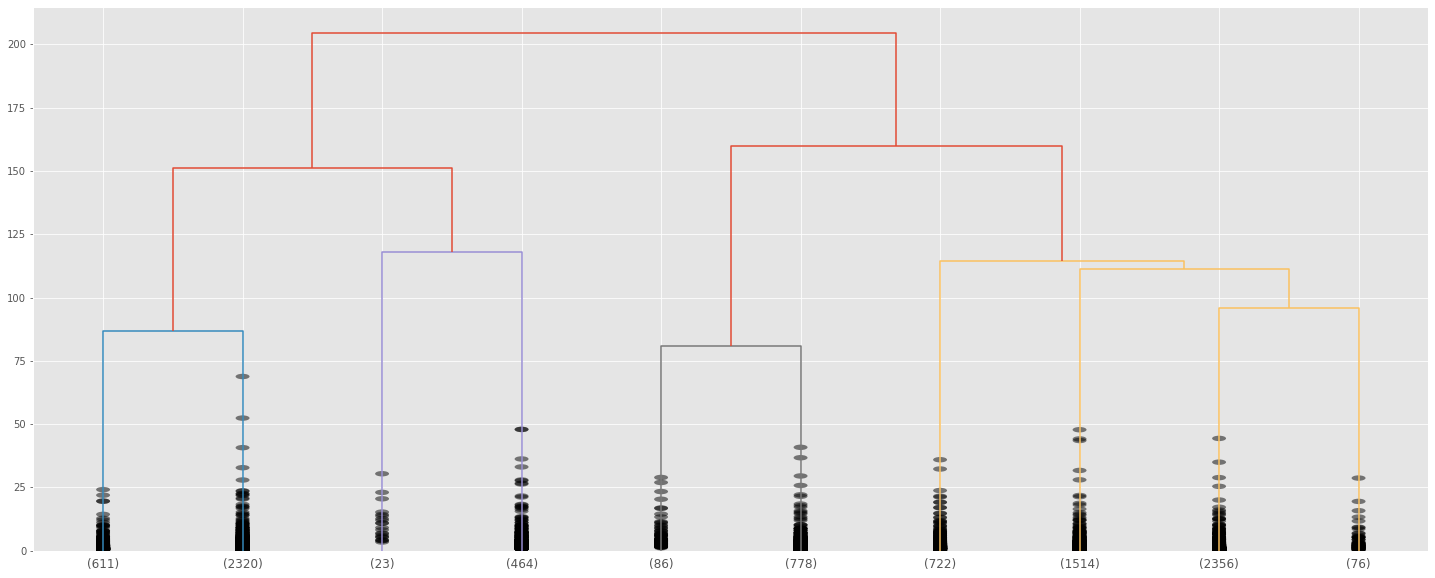

In [19]:
## let see minimized dendrogram 
plt.figure(figsize=(25,10))
dend = dendrogram(enlaces, truncate_mode="lastp", p = 10, show_leaf_counts= True, show_contracted= True) 

In [21]:
## automatic cut of the dendrogram 

from scipy.cluster.hierarchy import inconsistent
depth = 5
incons = inconsistent(enlaces, depth)
incons[-10:]

array([[21.97419594, 16.58688661, 31.        ,  3.09828851],
       [23.05757683, 16.5325588 , 28.        ,  3.50450043],
       [25.8868577 , 20.61648403, 31.        ,  2.9564118 ],
       [21.76042969, 19.74351012, 28.        ,  3.75734754],
       [31.5069608 , 24.68252384, 30.        ,  3.23613235],
       [37.02597724, 27.87706206, 31.        ,  2.77871071],
       [28.78510732, 22.40517973, 26.        ,  3.9750264 ],
       [40.79174395, 32.02225937, 31.        ,  3.44738121],
       [47.0476975 , 34.53334952, 30.        ,  3.26272767],
       [66.8782437 , 45.03114019, 31.        ,  3.05487248]])

[204.44263468 159.72061238 151.18467921 117.84628816 114.48826802
 111.38287479  95.94365888  86.83767443  80.99593623  73.36515616]
[ 36.18608914 -24.80245789  29.98037092   0.25262691 -12.33382268
   6.33323146   3.26424625  -1.78904186]


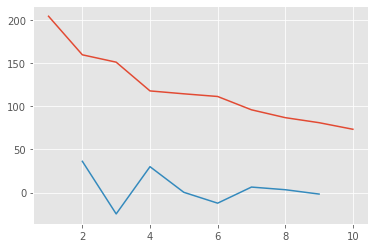

In [22]:
last = enlaces[-10:,2]
last_rev = last[::-1]
print(last_rev)

idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
print(acc_rev)
plt.plot(idx[:-2]+1, acc_rev)

In [31]:
## visualization of cluster 

from scipy.cluster.hierarchy import fcluster

## Put the tags in the elements 
clusteres = fcluster(enlaces, 4, criterion="maxclust")
datacopia['Cluster'] = clusteres
datacopia['Cluster'] = clusteres
datacopia.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068,4
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068,3
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068,1
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.36068,4
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068,4


(-5.0, 30.0)

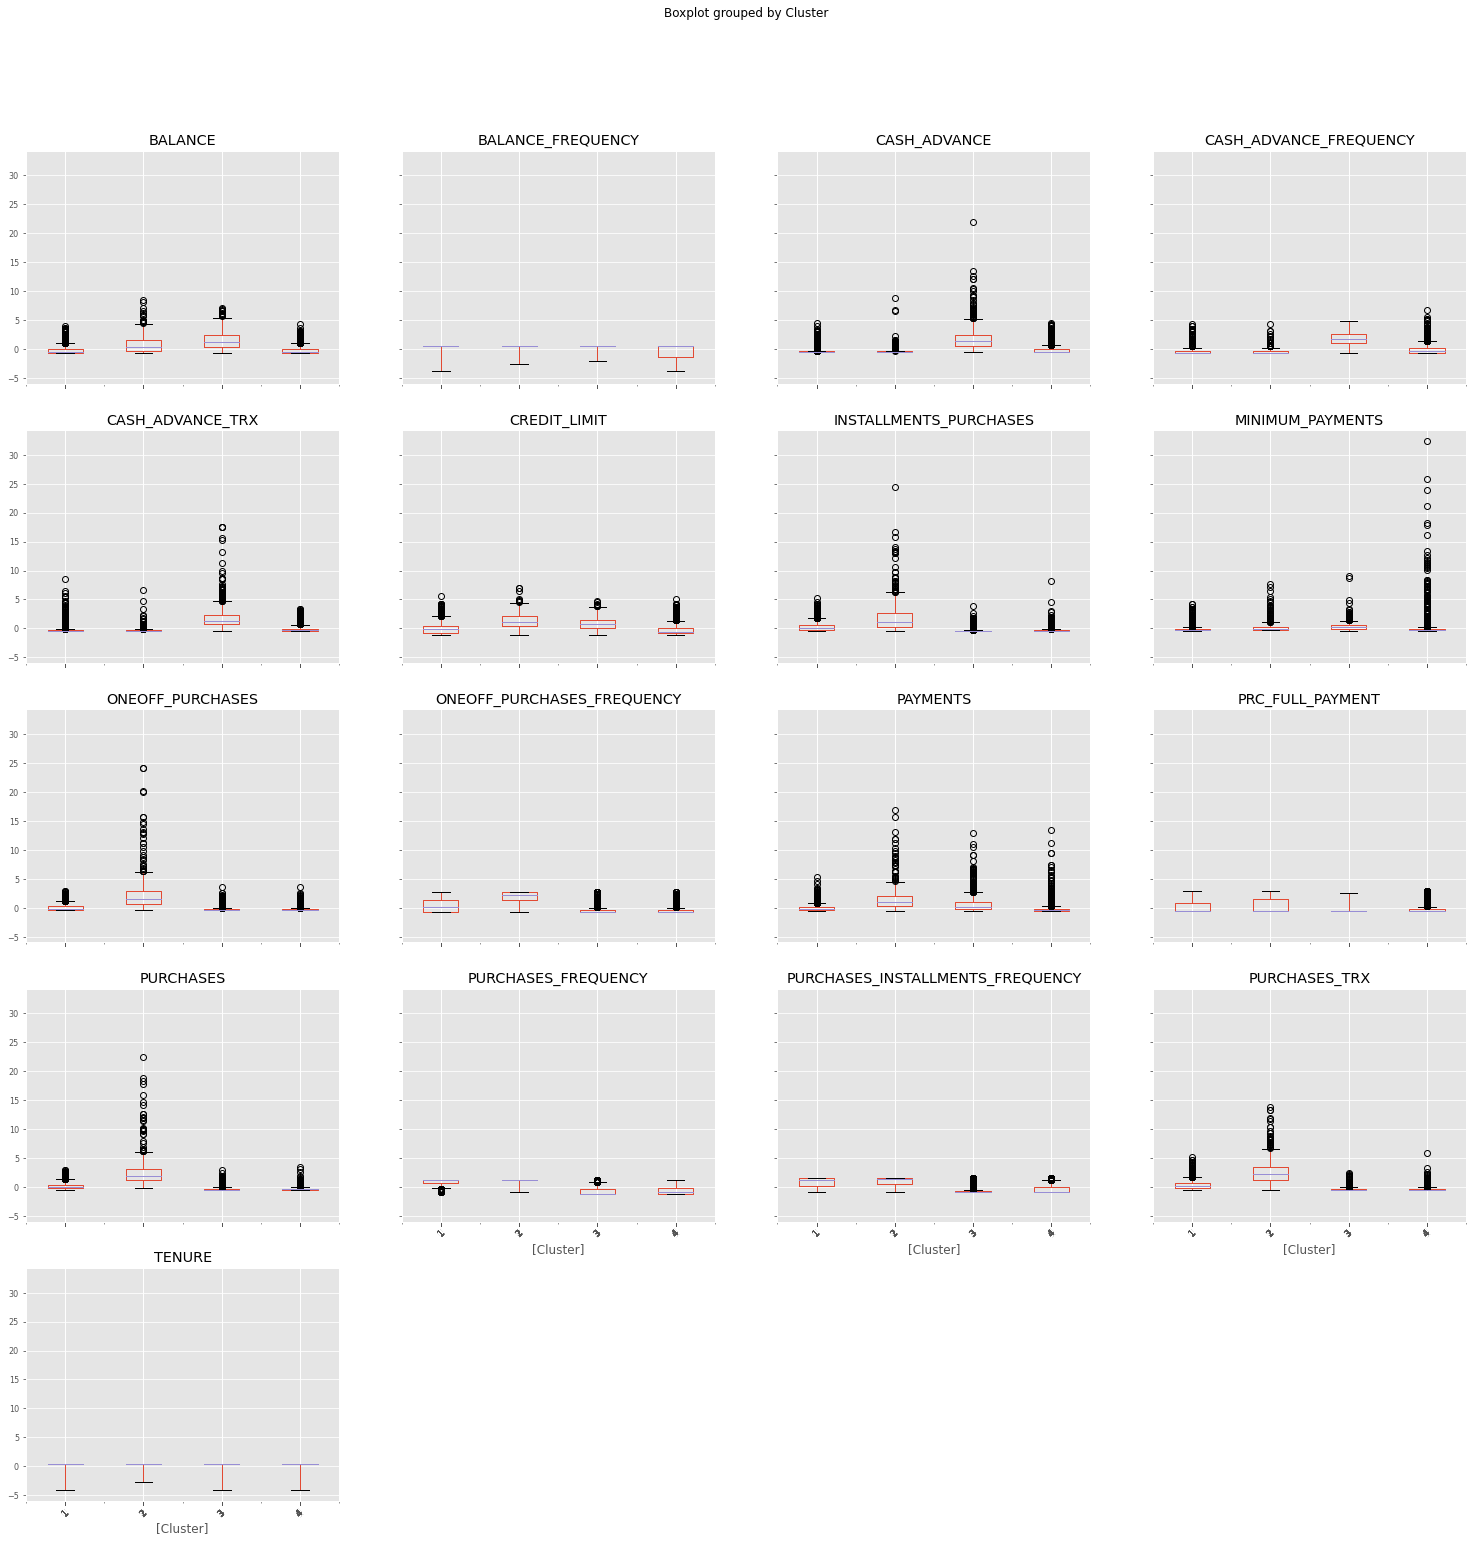

In [32]:
datacopia.boxplot(figsize = (25,25), fontsize = 8, by='Cluster', rot =45, autorange = True );
plt.ylim(-5, 30)

(-1.0, 30.0)

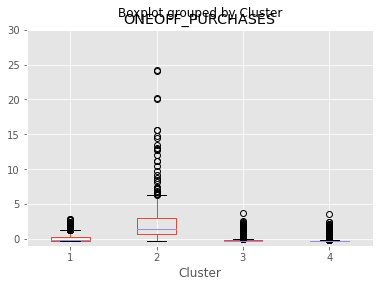

In [33]:
datacopia.boxplot(column='ONEOFF_PURCHASES', by='Cluster' )
plt.ylim(-1,30)

(-1.0, 30.0)

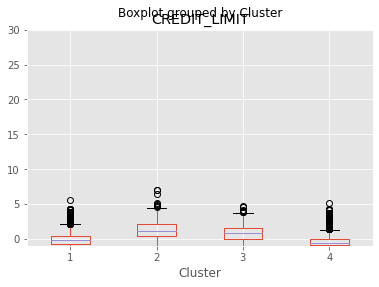

In [34]:
datacopia.boxplot(column='CREDIT_LIMIT', by='Cluster' )
plt.ylim(-1,30)

(-1.0, 20.0)

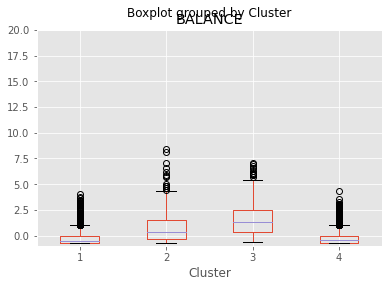

In [35]:
datacopia.boxplot(column='BALANCE', by='Cluster' )
plt.ylim(-1,20)

IDENTIFIED CLUSTERS

CLUSTER 1 - PEOPLE WITH LOW LEVEL OF INCOME. Not Frequent purchases.

CLUSTER 2 - PEOPLE WITH MEDIAN LEVEL O INCOME. High Frequent purchases.

CLUSTER 3 - PEOPLE WITH HIGH LEVEL OF INCOME. Not Frequent purchases and the most high advance level.

CLUSTER 4 - PEOPLE WITH LOW LEVEL OF INCOME. Frequent purchases.


<AxesSubplot:>

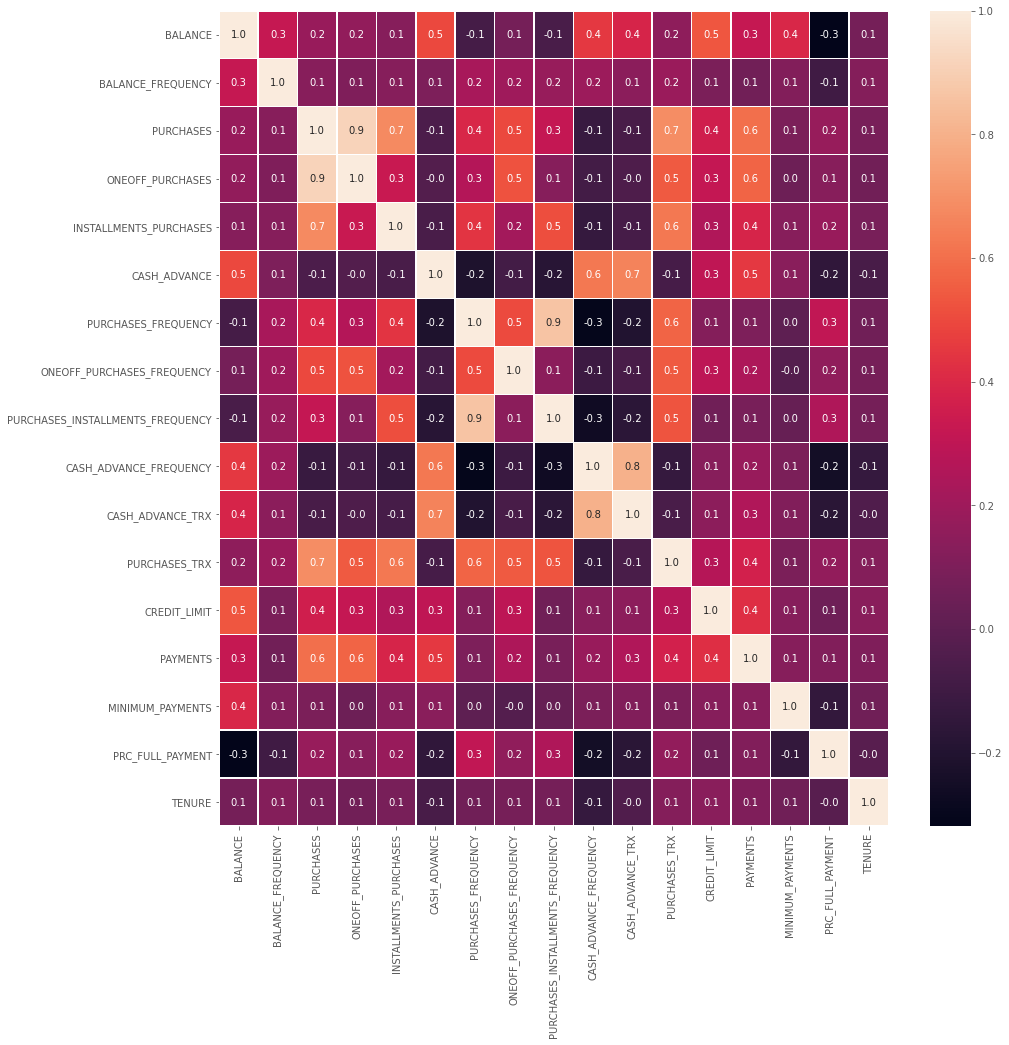

In [18]:
#visualise the Correlation Map
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Feature Scalling

In [38]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
X = standardscaler.fit_transform(df)

# K-Means Clustering

the elbow method to find the optimal number of clusters

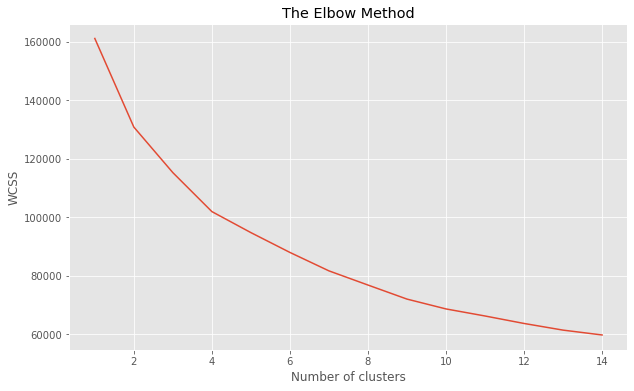

In [39]:
plt.figure(figsize=(10,6))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Elbow point starting from 8

In [40]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [41]:
kmeans.cluster_centers_


array([[-6.99143996e-01, -2.00288870e+00, -3.00461151e-01,
        -2.40284795e-01, -2.68590837e-01, -3.33730619e-01,
        -4.38487678e-01, -4.43032059e-01, -3.19312334e-01,
        -5.32550750e-01, -3.83703046e-01, -3.80734802e-01,
        -1.80014753e-01, -2.16405589e-01, -2.61589769e-01,
         2.98456310e-01,  2.17154560e-01,  8.63066316e-01],
       [-1.76740079e-01,  4.02028854e-01,  3.71667624e-01,
         5.18443991e-01, -7.38010949e-02, -3.26814313e-01,
         8.55010542e-01,  1.79307528e+00, -1.12351882e-02,
        -3.83128660e-01, -3.06430806e-01,  4.35510175e-01,
         2.42084424e-01,  3.68066284e-02, -1.59540055e-01,
         3.46347134e-01,  2.93831573e-01, -1.22337524e+00],
       [ 8.48902138e-01,  4.70511604e-01,  2.22922662e+00,
         1.77005588e+00,  2.01912661e+00, -2.03513640e-01,
         1.15949434e+00,  1.64051675e+00,  1.19489241e+00,
        -3.10492138e-01, -2.15022389e-01,  2.69189635e+00,
         1.23902756e+00,  1.25145424e+00,  3.98082335e

In [42]:
#Let’s see the cluster for each customer

y_kmeans = kmeans.predict(X)
df["cluster"] = y_kmeans
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4,7
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3,5
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4,7
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4,7


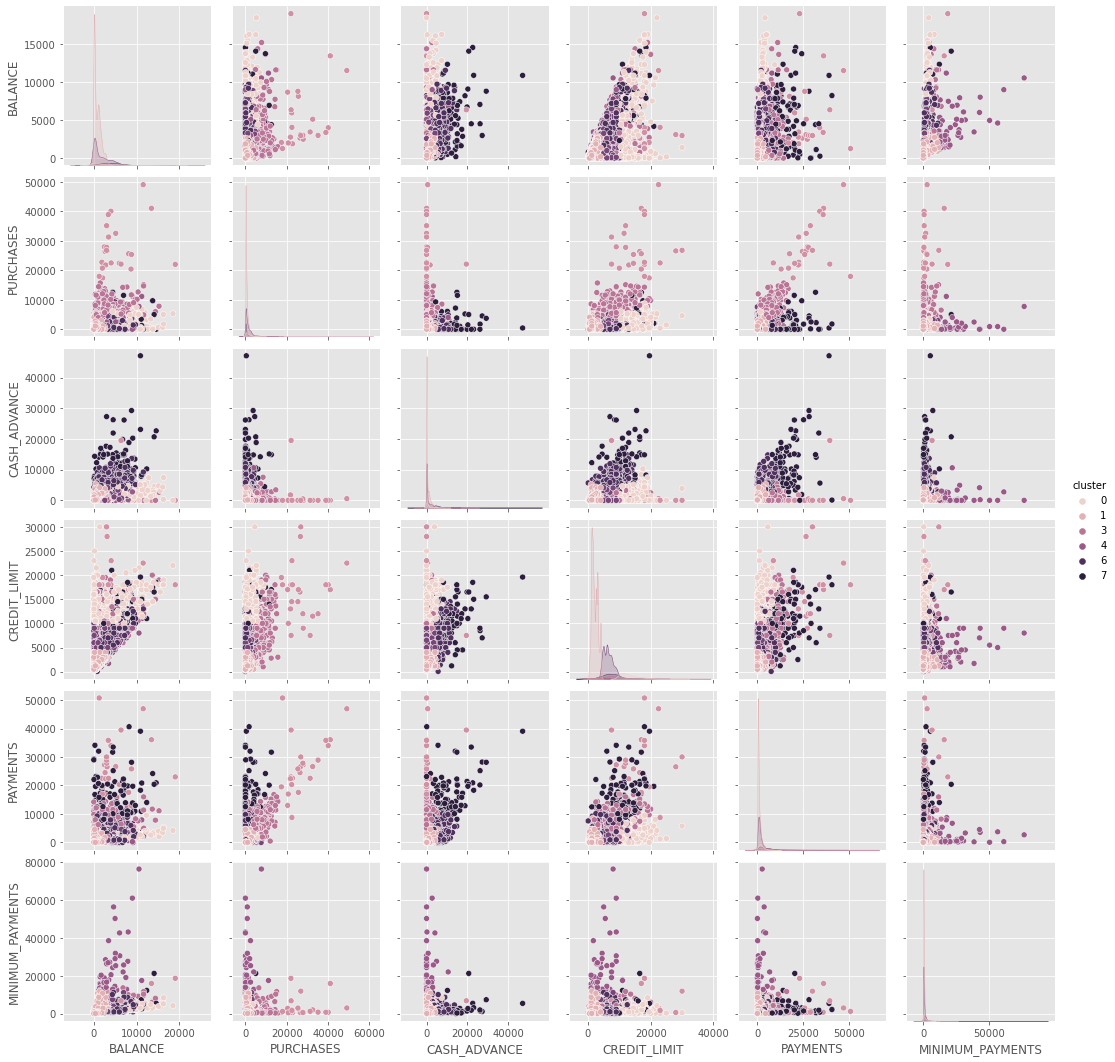

In [43]:
#Plot data after k = 8 clustering on important columns

best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]
kmeans = KMeans(n_clusters=8, init="k-means++", n_init=10, max_iter=300) 
best_vals = df[best_cols].iloc[ :, 1:].values
y_pred = kmeans.fit_predict( best_vals )

df["cluster"] = y_pred
best_cols.append("cluster")
sns.pairplot( df[ best_cols ], hue="cluster")

Finding behaviour with 5 Clusters:

In [56]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(df)
km_5.labels_

array([0, 4, 4, ..., 0, 0, 0])

In [57]:
pd.Series(km_5.labels_).value_counts()


0    5603
4    2579
1     687
3      56
2      25
dtype: int64

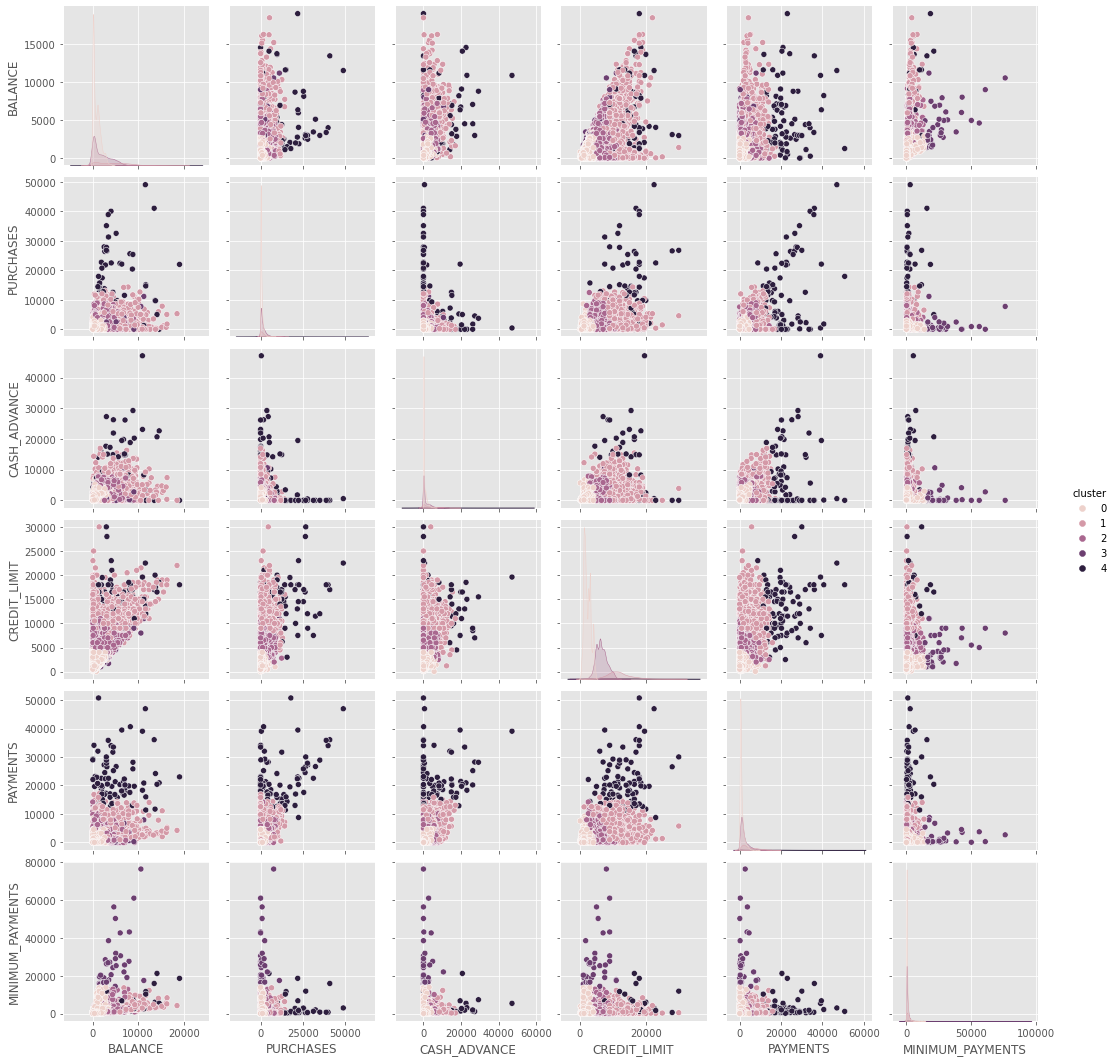

In [62]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=10, max_iter=300) 
best_vals = df[best_cols].iloc[ :, 1:].values
y_pred = kmeans.fit_predict( best_vals )

df["cluster"] = y_pred
best_cols.append("cluster")
sns.pairplot( df[ best_cols ], hue="cluster")